# Multipe_Input_Output
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [4]:
df = pd.read_csv('BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [5]:
df = df.drop(['Adj Close','Volume','Low'], axis=1)
df.head()

,Open,High,Close
Date,,,
2022-01-22,36471.589844,36688.812500,35030.250000
2022-01-23,35047.359375,36433.312500,36276.804688
2022-01-24,36275.734375,37247.519531,36654.328125
2022-01-25,36654.804688,37444.570313,36954.003906
2022-01-26,36950.515625,38825.410156,36852.121094


In [6]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[36471.589844, 36688.8125  , 35030.25    ],
       [35047.359375, 36433.3125  , 36276.804688],
       [36275.734375, 37247.519531, 36654.328125],
       [36654.804688, 37444.570313, 36954.003906],
       [36950.515625, 38825.410156, 36852.121094]])

### plotting data

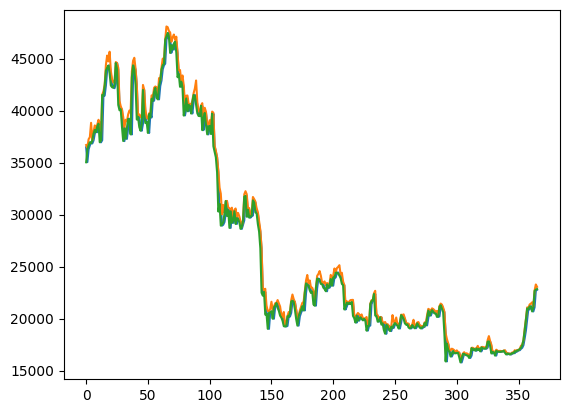

In [7]:
plt.plot(dataset)
plt.show()

### normalizing data

In [8]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.65318238 0.64195202 0.60744664]
 [0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]] 

(366, 3)


### Method for making data and timestep

In [9]:
# lookback -> timestep
def create_dataset(dataset, n_step_in, n_step_out):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-n_step_in-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+n_step_in),:])
        data_y.append(dataset[i+n_step_in:i+n_step_in+n_step_out,:])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [10]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size] , dataset[train_size:len(dataset)]
print(train.shape)
print(test.shape)

(292, 3)
(74, 3)


In [11]:
train[:8]

array([[0.65318238, 0.64195202, 0.60744664],
       [0.60821794, 0.63392596, 0.64679689],
       [0.64699902, 0.65950278, 0.65871425],
       [0.65896666, 0.66569277, 0.66817418],
       [0.66830256, 0.70906931, 0.66495802],
       [0.66487279, 0.65638674, 0.67398982],
       [0.67391999, 0.68166035, 0.69438531],
       [0.69451282, 0.70124277, 0.70555529]])

### Making data train & test x,y

In [64]:
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [19]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(287, 4, 3) (287, 2, 3)
(69, 4, 3) (69, 2, 3)


In [18]:
train_x[:3]

array([[[0.65318238, 0.64195202, 0.60744664],
        [0.60821794, 0.63392596, 0.64679689],
        [0.64699902, 0.65950278, 0.65871425],
        [0.65896666, 0.66569277, 0.66817418]],

       [[0.60821794, 0.63392596, 0.64679689],
        [0.64699902, 0.65950278, 0.65871425],
        [0.65896666, 0.66569277, 0.66817418],
        [0.66830256, 0.70906931, 0.66495802]],

       [[0.64699902, 0.65950278, 0.65871425],
        [0.65896666, 0.66569277, 0.66817418],
        [0.66830256, 0.70906931, 0.66495802],
        [0.66487279, 0.65638674, 0.67398982]]])

In [20]:
for i in range(len(train_x)):   
    print(train_x[i],train_y[i],'\n')

# print(train_x[:5],'\n')
# print(train_y[:5])

[[0.65318238 0.64195202 0.60744664]
 [0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]] [[0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]] 

[[0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]] [[0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]] 

[[0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]] [[0.67391999 0.68166035 0.69438531]
 [0.69451282 0.70124277 0.70555529]] 

[[0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]] [[0.69451282 0.70124277 0.70555529]
 [0.70623209 0.69150715 0.69859226]] 

[[0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]
 [0.69451282

### training model

In [21]:
n_features = train_x.shape[2]
n_features

3

In [23]:

#stack lstm
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape=(n_step_in,n_features)))   
model.add(RepeatVector(n_step_out))   
model.add(LSTM(50,activation = 'relu',return_sequences=True))   
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam',loss='mse')   

In [27]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)

Epoch 1/50
144/144 [==============================] - 3s 5ms/step - loss: 0.1276
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0273
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0160
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0136
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0093
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0078
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0069
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0058
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 13/50
144/144 [====

### saving model

In [28]:
model.save('savedata')

INFO:tensorflow:Assets written to: savedata/assets


INFO:tensorflow:Assets written to: savedata/assets


In [24]:
# loading model
model = tf.keras.models.load_model('savedata')

### Testing model

In [71]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

3/3 [==============================] - 0s 3ms/step


In [72]:
print('predicted y(train):', predict_train[:2],'\n')
print('real y(train):', train_y[:2])

predicted y(train): [[[0.5337198  0.532836   0.5261855 ]
  [0.54293025 0.54566    0.53958654]]

 [[0.5425372  0.5419725  0.53504914]
  [0.5516827  0.5545286  0.5483367 ]]] 

real y(train): [[[0.66830256 0.70906931 0.66495802]
  [0.66487279 0.65638674 0.67398982]]

 [[0.66487279 0.65638674 0.67398982]
  [0.67391999 0.68166035 0.69438531]]]


- #### we must reshape it


In [73]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(287, 2, 3)
(69, 2, 3)
(287, 2, 3)
(69, 2, 3)


In [74]:
predict_train = predict_train.reshape(-1,3)
predict_test = predict_test.reshape(-1,3)
train_y = train_y.reshape(-1,3)
test_y = test_y.reshape(-1,3)

In [75]:
print(predict_train.shape)
print(predict_test.shape)
print(train_y.shape)
print(test_y.shape)

(574, 3)
(138, 3)
(574, 3)
(138, 3)


In [58]:
predict_train[:2]

array([[0.5337198 , 0.532836  , 0.5261855 ],
       [0.54293025, 0.54566   , 0.53958654]], dtype=float32)

In [59]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform(train_y)

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform(test_y)

In [60]:
print(predict_train[:5])

[[32687.658 33215.234 32456.023]
 [32979.395 33623.473 32880.547]
 [32966.945 33506.086 32736.81 ]
 [33256.625 33905.793 33157.74 ]
 [32769.81  33302.418 32549.63 ]]


### creating df and plotting

In [35]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,32687.658203,36950.515625
1,33215.234375,38825.410156
2,32456.023438,36852.121094
3,32979.394531,36841.878906
4,33623.472656,37148.324219


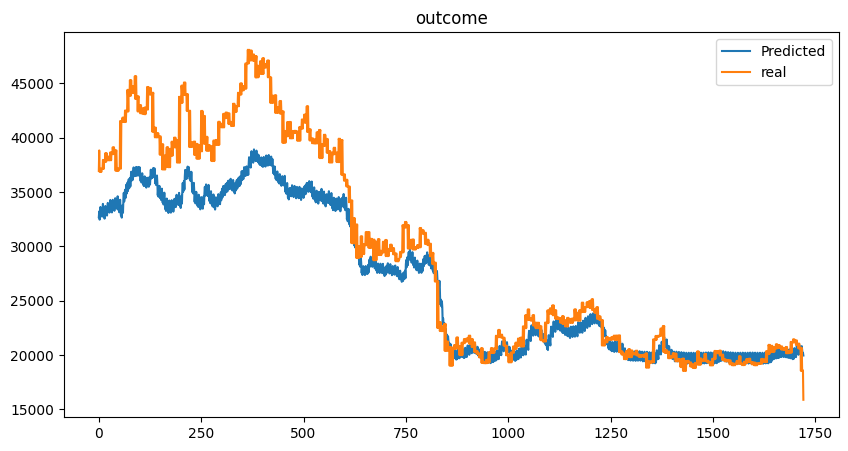

In [37]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [ ]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [38]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,19700.035156,16352.028320
1,20113.453125,17109.324219
2,19853.683594,16618.199219
3,19090.087891,16617.484375
4,19356.994141,17051.962891


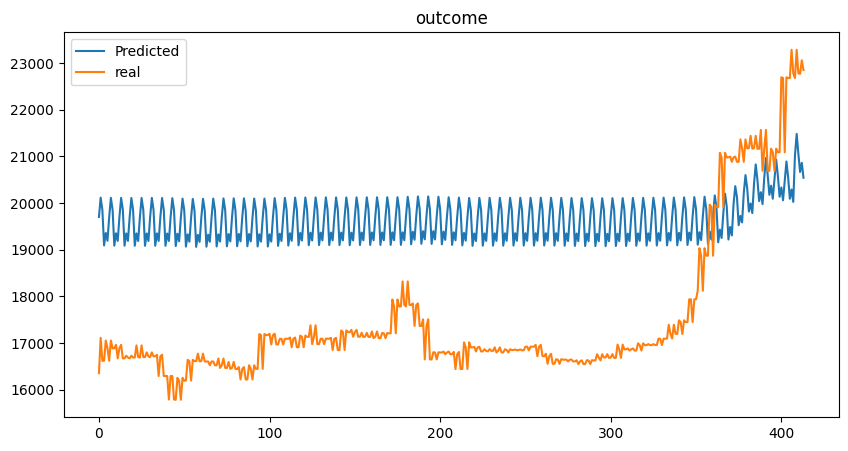

In [39]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [96]:
#run anew the cell
n_step_in , n_step_out = 4 , 2 #timestep or look_up

train_x , train_y = create_dataset(train, n_step_in, n_step_out)
test_x , test_y = create_dataset(test, n_step_in, n_step_out)

In [97]:
model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 4ms/step - loss: 0.0065


0.006477328948676586

### new testing
- we must change dim

In [125]:
test_x.shape , test_y.shape

((69, 4, 3), (69, 2, 3))

In [126]:
test_ = array([[0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666],
               [0.65318238, 0.60821794, 0.64699902, 0.65896666]])
test_ = test_.reshape(1,n_step_in,n_features)


print(test_.shape,'\n')
print(test_)

(1, 4, 3) 

[[[0.65318238 0.60821794 0.64699902]
  [0.65896666 0.65318238 0.60821794]
  [0.64699902 0.65896666 0.65318238]
  [0.60821794 0.64699902 0.65896666]]]


In [127]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 23ms/step


array([[[0.52128184, 0.51999515, 0.5139533 ],
        [0.53078485, 0.53316724, 0.5276483 ]]], dtype=float32)

In [128]:
y_hat = y_hat.reshape(-1,3)

In [129]:
y_hat.shape

(2, 3)

In [130]:
y_hat

array([[0.52128184, 0.51999515, 0.5139533 ],
       [0.53078485, 0.53316724, 0.5276483 ]], dtype=float32)

In [131]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[32293.691, 32806.46 , 32068.525],
       [32594.695, 33225.78 , 32502.361]], dtype=float32)